<a href="https://colab.research.google.com/github/diegomarlop/LAB_IRONHACK/blob/main/Lab4_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.



In [ ]:
#Import the necessary libraries if you are starting a new notebook.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
#Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
customer_df.shape

(9134, 23)

In [ ]:
#What should we do with the customer_id column?
#Creo que debería ser borrada ya que solo es un identificador de del customer
customer_df = customer_df.drop('Customer',axis=1)

In [ ]:
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
def clean_headers(x):
  x.columns =[i.lower().replace(' ','_') for i in x.columns]
  x['effective_to_date']= pd.to_datetime(x['effective_to_date'],errors='coerce')
  return x

In [ ]:
customer_df = clean_headers(customer_df)

In [ ]:
customer_df.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

In [ ]:
#Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
numerical_df = customer_df.select_dtypes(include=np.number)
categorical_df = customer_df.select_dtypes(include=np.object)

<ipython-input-34-84466f7849c5>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = customer_df.select_dtypes(include=np.object)


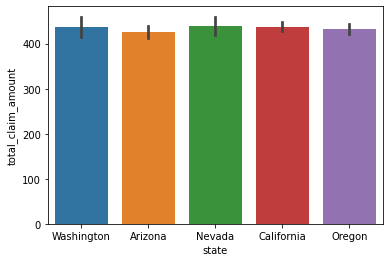

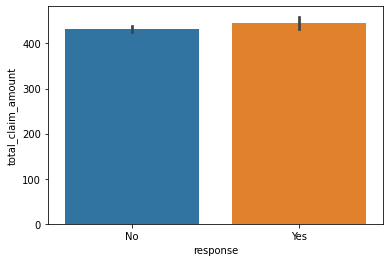

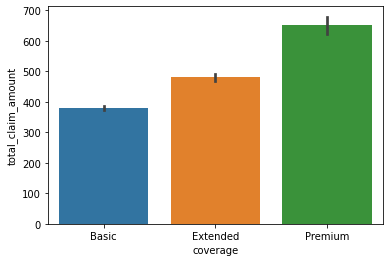

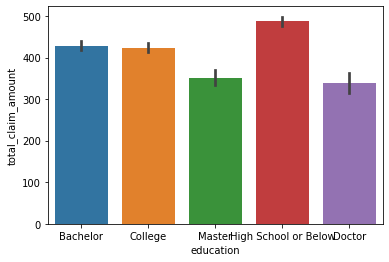

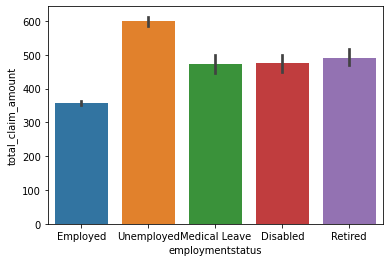

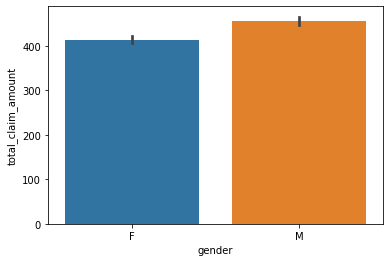

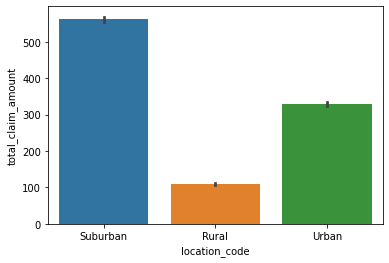

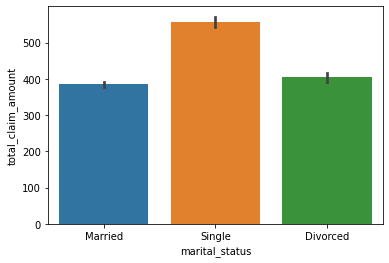

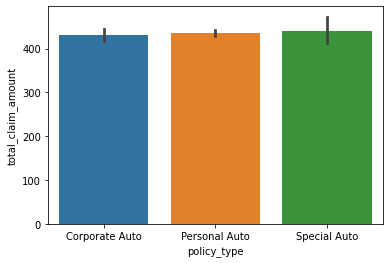

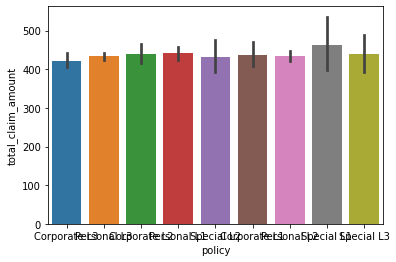

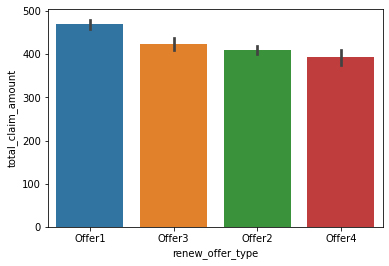

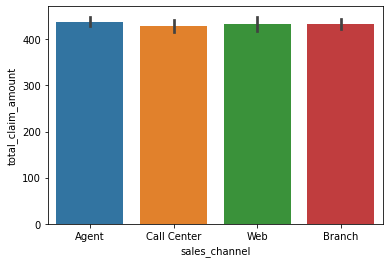

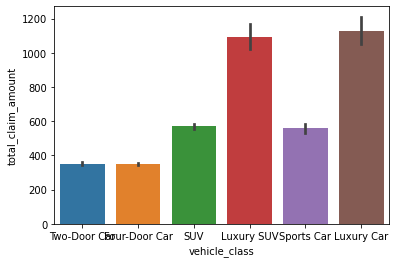

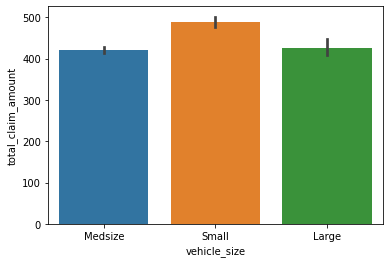

In [ ]:
#Plot every categorical variable. What can you see in the plots? 
#Note that in the previous lab you used a bar plot to plot categorical data, 
#with each unique category in the column on the x-axis and an appropriate measure on the y-axis. 
#However, this time you will try a different plot. 
#This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
sns.barplot(data=customer_df,x='state',y='total_claim_amount')
plt.show()
sns.barplot(data=customer_df,x='response',y='total_claim_amount')
plt.show()
sns.barplot(data=customer_df,x='coverage',y='total_claim_amount')
plt.show()
sns.barplot(data=customer_df,x='education',y='total_claim_amount')
plt.show()
sns.barplot(data=customer_df,x='employmentstatus',y='total_claim_amount')
plt.show()
sns.barplot(data=customer_df,x='gender',y='total_claim_amount')
plt.show()
sns.barplot(data=customer_df,x='location_code',y='total_claim_amount')
plt.show()
sns.barplot(data=customer_df,x='marital_status',y='total_claim_amount')
plt.show()
sns.barplot(data=customer_df,x='policy_type',y='total_claim_amount')
plt.show()
sns.barplot(data=customer_df,x='policy',y='total_claim_amount')
plt.show()
sns.barplot(data=customer_df,x='renew_offer_type',y='total_claim_amount')
plt.show()
sns.barplot(data=customer_df,x='sales_channel',y='total_claim_amount')
plt.show()
sns.barplot(data=customer_df,x='vehicle_class',y='total_claim_amount')
plt.show()
sns.barplot(data=customer_df,x='vehicle_size',y='total_claim_amount')
plt.show()


In [ ]:
#For the categorical data, check if there is any data cleaning that need to perform. 
#Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column.
# Discuss if this information might in some way be used for data cleaning.

In [ ]:
for i in categorical_df:
  print(100*categorical_df[i].value_counts()/len(categorical_df[i]))

California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64
No     85.679877
Yes    14.320123
Name: response, dtype: float64
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64
Employed      62.382308
Unemployed    25.366762
other         12.250931
Name: employmentstatus, dtype: float64
F    50.996278
M    49.003722
Name: gender, dtype: float64
Suburban    63.269104
Rural       19.410992
Urban       17.319904
Name: location_code, dtype: float64
Married     58.003065
Single      27.008977
Divorced    14.987957
Name: marital_status, dtype: float64
Personal Auto     74.315743
Corporate Auto    21.545873
Special Auto       4.138384
Name: policy_type, dtype: flo

In [ ]:
categorical_df['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [ ]:
vals=pd.DataFrame(categorical_df['employmentstatus'].value_counts())
vals=vals.reset_index()
vals.columns=['employmentstatus','counts']
vals

,employmentstatus,counts
0,Employed,5698
1,Unemployed,2317
2,Medical Leave,432
3,Disabled,405
4,Retired,282


In [ ]:
#me quedare solo con los employmentstatus arriba de 2000 customers 
emp_status =vals[vals['counts']>2000]
emp_status =list(emp_status['employmentstatus'])
emp_status

['Employed', 'Unemployed']

In [ ]:
def clean_empstatus(x):
  if x in emp_status:
    return x
  else:
    return 'other'

In [ ]:
categorical_df['employmentstatus']=list(map(clean_empstatus,categorical_df['employmentstatus']))
categorical_df['employmentstatus'].value_counts()

<ipython-input-39-09d0645ed5cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['employmentstatus']=list(map(clean_empstatus,categorical_df['employmentstatus']))


Employed      5698
Unemployed    2317
other         1119
Name: employmentstatus, dtype: int64

In [ ]:
#ahora par la columna de education 
v2 = pd.DataFrame(categorical_df['education'].value_counts())
v2 = v2.reset_index()
v2.columns = ['education','counts']
v2

,education,counts
0,Bachelor,2748
1,College,2681
2,High School or Below,2622
3,Master,741
4,Doctor,342


In [ ]:
#me quedare solo con los employmentstatus arriba de 2000 customers 
emp_edu =v2[v2['counts']>2000]
emp_edu =list(emp_edu['education'])
emp_edu

['Bachelor', 'College', 'High School or Below']

In [ ]:
def clean_edu(x):
  if x in emp_edu:
    return x
  else:
    return 'other'

In [ ]:
categorical_df['education']=list(map(clean_edu,categorical_df['education']))
categorical_df['education'].value_counts()

<ipython-input-45-809fd3eee236>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['education']=list(map(clean_edu,categorical_df['education']))


Bachelor                2748
College                 2681
High School or Below    2622
other                   1083
Name: education, dtype: int64

In [ ]:
#ahora para policy ya que tiene algunos valores que solo representan hasta el 6% 
v3 = pd.DataFrame(categorical_df['policy'].value_counts())
v3 = v3.reset_index()
v3.columns=['policy','counts']
v3

,policy,counts
0,Personal L3,3426
1,Personal L2,2122
2,Personal L1,1240
3,Corporate L3,1014
4,Corporate L2,595
5,Corporate L1,359
6,Special L2,164
7,Special L3,148
8,Special L1,66


In [ ]:
#me quedare sólo con los policy arriba de 1000 customers 
emp_pol =v3[v3['counts']>1000]
emp_pol =list(emp_pol['policy'])
emp_pol

['Personal L3', 'Personal L2', 'Personal L1', 'Corporate L3']

In [ ]:
def clean_pol(x):
  if x in emp_pol:
    return x
  else:
    return 'other'

In [ ]:
categorical_df['policy']=list(map(clean_pol,categorical_df['policy']))
categorical_df['policy'].value_counts()

<ipython-input-51-ecbceda64c2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['policy']=list(map(clean_pol,categorical_df['policy']))


Personal L3     3426
Personal L2     2122
other           1332
Personal L1     1240
Corporate L3    1014
Name: policy, dtype: int64

In [ ]:
#ahora para vehicle class
v4 = pd.DataFrame(categorical_df['vehicle_class'].value_counts())
v4 = v4.reset_index()
v4.columns = ['vehicle_class','counts']
v4

,vehicle_class,counts
0,Four-Door Car,4621
1,Two-Door Car,1886
2,SUV,1796
3,Sports Car,484
4,Luxury SUV,184
5,Luxury Car,163


In [ ]:
#
emp_veh = v4[v4['counts']>1000]
emp_veh = list(emp_veh['vehicle_class'])
emp_veh

['Four-Door Car', 'Two-Door Car', 'SUV']

In [ ]:
def clean_veh(x):
  if x in emp_veh:
    return x
  else:
    return 'other'

In [ ]:
categorical_df['vehicle_class']=list(map(clean_veh,categorical_df['vehicle_class']))
categorical_df['vehicle_class'].value_counts()

<ipython-input-55-6c83ad0a8f63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['vehicle_class']=list(map(clean_veh,categorical_df['vehicle_class']))


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
other             831
Name: vehicle_class, dtype: int64

In [ ]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,other,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,other,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large
